In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
from scipy.signal import butter
from scipy.signal import filtfilt
import matplotlib.pyplot as plt

In [3]:
from utils import *

In [7]:
import os
cwd = os.getcwd()
print(cwd)

/Users/james/Documents/Research/oklahoma-wind-turbine/python


In [9]:
# 06/02/23 data
filepath = '/Users/james/Documents/Research/oklahoma-wind-turbine/data/das/recording_2023-05-30T11_26_05-0500/'
decim_to_100(filepath,'sensor_2023-05-30T112603-0500')

### First decimate the files down to 100 Hz

In [25]:
directory = '/Users/james/Documents/Research/oklahoma-wind-turbine/data/das/recording_2023-05-30T11_26_05-0500/sensor_2023-05-30T112603-0500_decimated100hz'
strain_data = load_decim_data(directory)

In [26]:
print(np.shape(strain_data))

(102, 53584)


In [ ]:
# Each channel is approximately 8 CSUs, 1 CSU is approximately 1.027 meters
# We have 102 channel readouts

### Try to figure out which channels correspond with what!
#### Indexes: 
Estimate, from shed to beginning of first longitudinal cable: 10 meters ~ 1.5 channels<br />

### Look at the channels with highest strain first (Probably at the bottom of the tower)
#### Indexes:


In [40]:
from utils import filter_plot_single

In [41]:
phase_1 = filter_plot_single(strain_data)
# phase_2 = filter_plot_single(strain_data_P2)
# phase_3 = filter_plot_single(strain_data_P3)
# phase_4 = filter_plot_single(strain_data_P4)

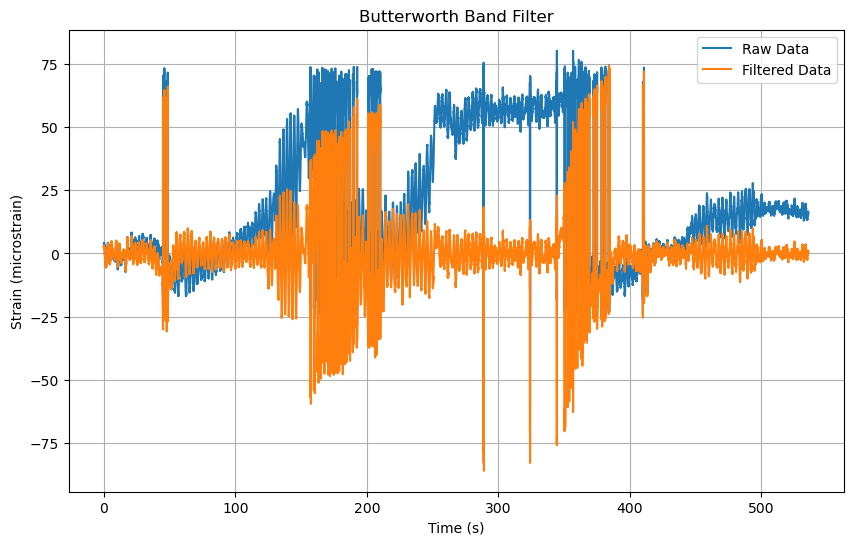

In [42]:
channel = 7
phase_1.butterworth(channel,order=2,cutoff_freq= 0.05)
phase_1.plot_side_by_side()
# phase_2.butterworth(channel,order=2,cutoff_freq= 0.05)
# phase_2.plot_side_by_side()
# phase_3.butterworth(channel,order=2,cutoff_freq= 0.05)
# phase_3.plot_side_by_side()
# phase_4.butterworth(channel,order=2,cutoff_freq= 0.05)
# phase_4.plot_side_by_side()

In [43]:
phase_1.psd_freqs()
# phase_2.psd_freqs()
# phase_3.psd_freqs()
# phase_4.psd_freqs()

(array([6.56517431e+04, 6.61340721e+04, 6.17584264e+04, ...,
        1.20369403e+01, 1.14275434e+01, 4.03078203e+00]),
 array([0.00000000e+00, 1.86619390e-03, 3.73238779e-03, ...,
        4.99953345e+01, 4.99972007e+01, 4.99990669e+01]))

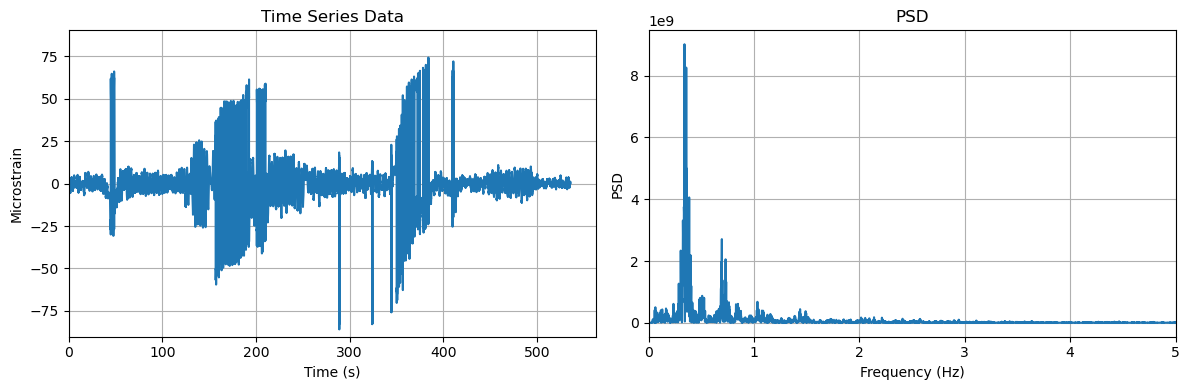

In [44]:
phase_1.plot_psd_filtered(5)
# phase_2.plot_psd_filtered(5)
# phase_3.plot_psd_filtered(5)
# phase_4.plot_psd_filtered(5)

In [58]:
# Listing the relevant channels
# channels = [6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,26,27,28,30,31,32,33,34,35,36,37,38,39] 

channels = range(6,10)
print(channels)
# recall that each channel is 1 csu ~ 8m
# channels = [54,53,52,51,50,49,48,46,45,44,43,39,38,37]
# channels = [12,13,14,15,16,17,19,20,21,22,26,27,54,53,52,51,50,49,48,46,45,44,43,39,38,37,59,60,61,62,63,64,66,67,68,69,74,75,76,104,103,102,101,100,99,97,96,95,94,90,89]

range(6, 10)


In [59]:
phase_1.butter_all(channels=channels,cutoff_freq=0.05)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

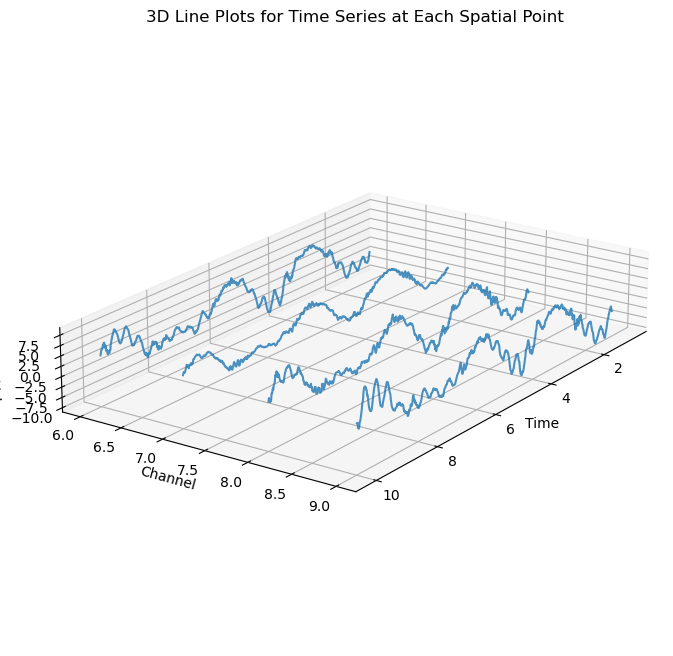

In [60]:
phase_1.iso_view_plot(channels=channels,time_start=100,time_end=1000)

### Comparing different phases all at once!

In [170]:
from utils import filter_plot_comparison

In [171]:
testing = filter_plot_comparison(strain_data_P1,strain_data_P2,strain_data_P3,strain_data_P4)

In [172]:
testing.butterworth(channels=channels,cutoff_freq=0.05);

In [174]:
print(channels)

[54, 53, 52, 51, 50, 49, 48, 46, 45, 44, 43, 39, 38, 37]


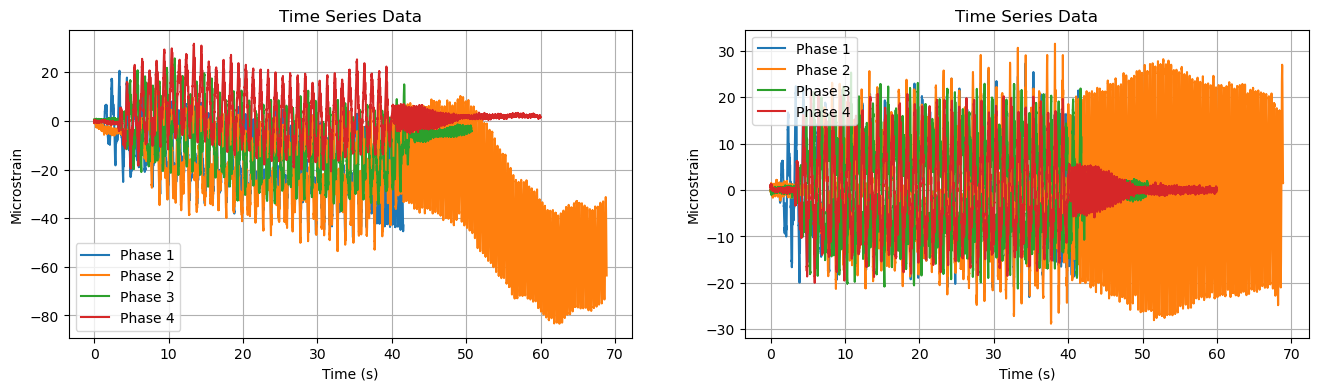

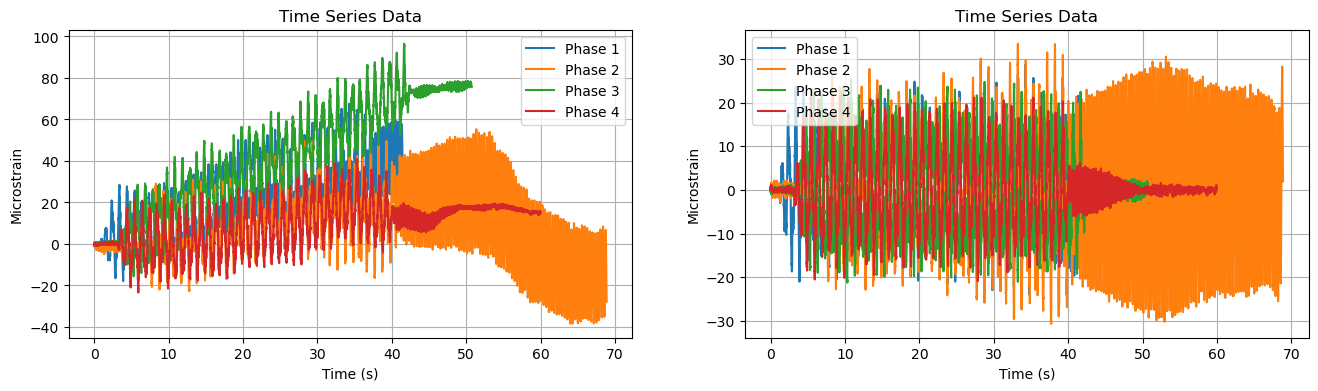

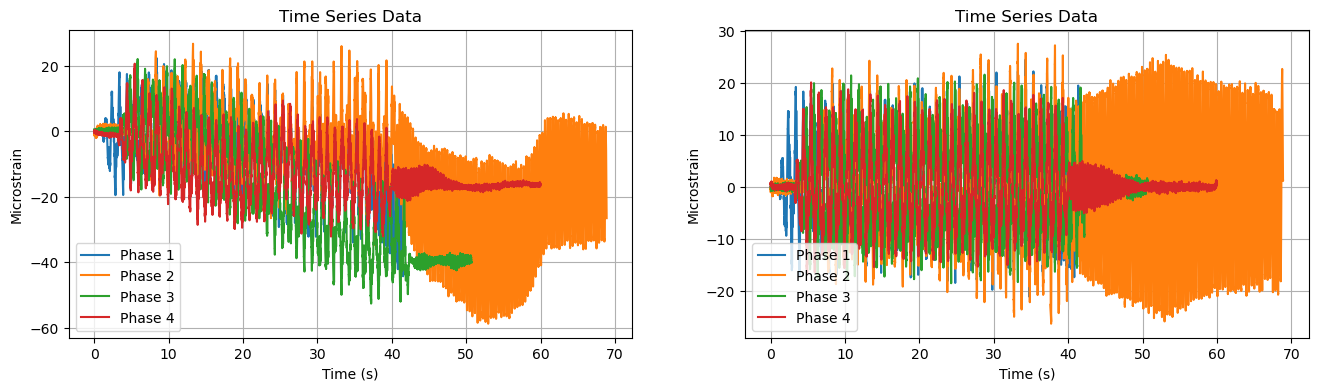

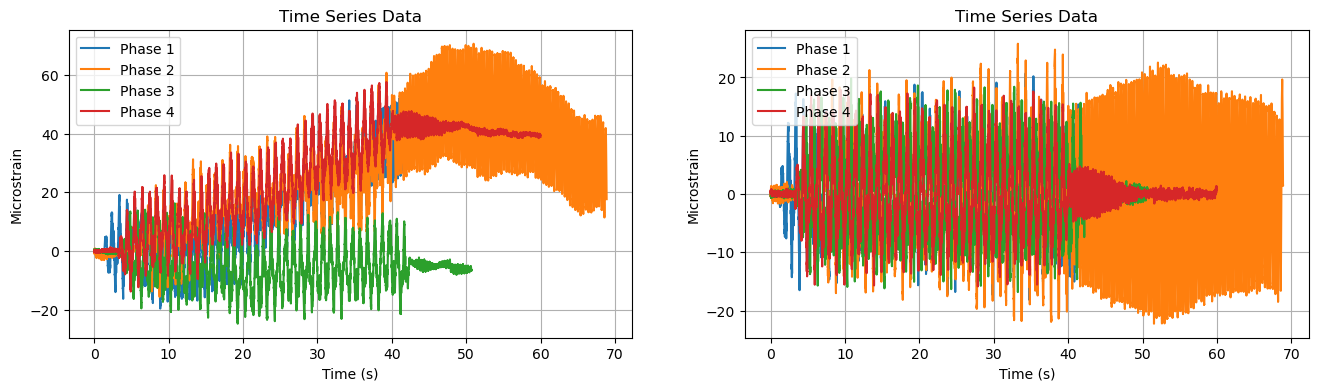

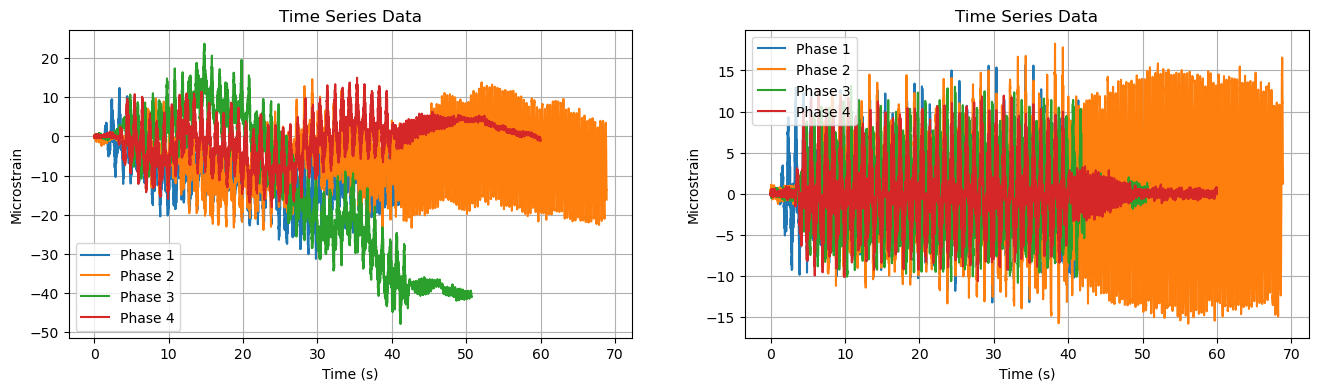

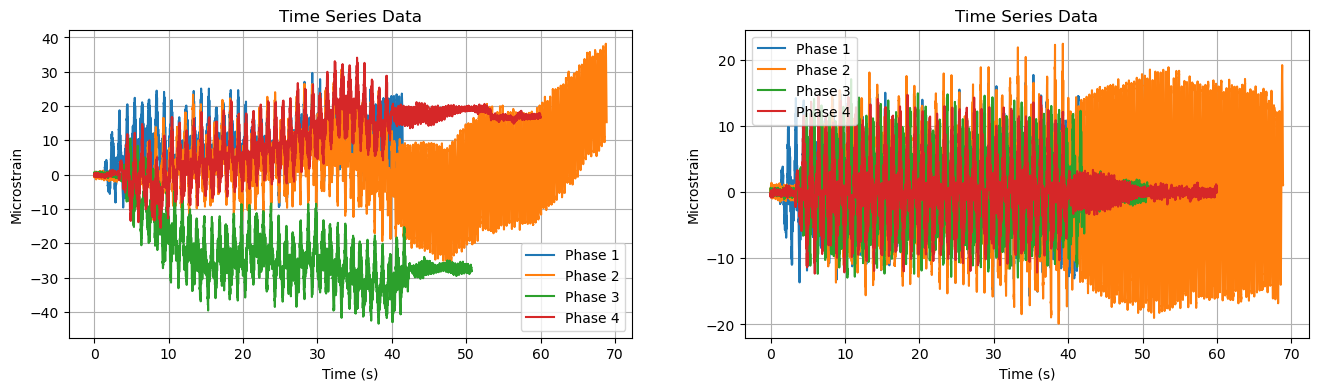

In [176]:
testing.plotting_all_phases(channel=46)
testing.plotting_all_phases(channel=45)
testing.plotting_all_phases(channel=44)
testing.plotting_all_phases(channel=43)
testing.plotting_all_phases(channel=39)
testing.plotting_all_phases(channel=38)